In [1]:
from numpy import uint8, uint16
from pandas import concat, read_csv

UINT8_ONE = uint8(1)
CATEGORY_MAP = {"2": UINT8_ONE, "D": UINT8_ONE, "S": uint8(2)}
UINT8_ZERO = uint8(0)
UINT16_ZERO = uint16(0)
convert_category = lambda value: CATEGORY_MAP.get(value.replace(" ", ""), UINT8_ZERO)
convert_numeric = lambda value: uint16(value.replace(" ", "").replace(",", "")) if value else UINT16_ZERO
CSV_KEYS = "DE", "DR", "V"
CONVERTERS = {
    "T": convert_category,
    "R": convert_category,
    "E": convert_numeric,
    "A": convert_numeric,
    "DE": convert_numeric,
    "DA": convert_numeric,
    "H": convert_numeric,
    "M": convert_numeric
}
df = concat(
    (read_csv(f"R/{key}.csv", index_col=0, converters=CONVERTERS) for key in CSV_KEYS), keys=CSV_KEYS, names=("RE",)
)
df

T  R   E  A  DE    DA     H     M
RE I                                     
DE 1    0  0   0  0   8  2947  1425  4611
   1    0  1   1  0   3  1818     0   650
   1    0  1   2  0   7  4735   487   308
   1    0  2   1  0   3  2078  2748     0
   1    0  2   1  1   3   269  5848   189
...    .. ..  .. ..  ..   ...   ...   ...
V  467  1  0   7  2   4  6453     0  9665
   467  1  1  10  0   5  6272    62  1417
   467  1  1   6  1   7  5267    78    76
   467  1  2   5  1   6  4602  8211   716
   467  1  2   2  5   7  1979  7396   329

[9110 rows x 8 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9110 entries, ('DE', np.int64(1)) to ('V', np.int64(467))
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       9110 non-null   uint8 
 1   R       9110 non-null   uint8 
 2   E       9110 non-null   uint16
 3   A       9110 non-null   uint16
 4   DE      9110 non-null   uint16
 5   DA      9110 non-null   uint16
 6   H       9110 non-null   uint16
 7   M       9110 non-null   uint16
dtypes: uint16(6), uint8(2)
memory usage: 171.3+ KB


In [3]:
from math import floor, log10

result = df.iloc[:, :2]
for col in df.columns.to_list()[2:]:
    for digit_index in range(floor(log10(df[col].max())), -1, -1):
        result[f"{col}{digit_index}"] = (df[col].to_numpy() // 10 ** digit_index % 10).astype(uint8)
result[10:20]

T  R  E1  E0  A1  A0  DE1  DE0  DA4  DA3  ...  H4  H3  H2  H1  H0  M4  \
RE I                                            ...                           
DE 2  0  0   2   3   0   9    1    0    1    0  ...   0   0   1   6   3   0   
   2  0  1   2   2   0   3    0    4    0    7  ...   0   0   0   0   0   0   
   2  0  1   2   1   0   2    1    1    1    1  ...   0   1   3   0   4   0   
   2  0  2   0   0   2   8    1    0    0    0  ...   1   1   7   2   6   0   
   2  0  2   1   7   1   4    0    7    0    3  ...   0   9   8   0   5   0   
   2  1  2   1   3   1   4    0    7    0    3  ...   0   8   4   7   3   0   
   2  1  2   1   8   2   0    0    7    0    5  ...   1   1   9   2   2   0   
   2  1  1   3   2   0   3    0    6    1    0  ...   0   0   2   4   8   0   
   2  1  1   2   4   0   1    0    7    0    8  ...   0   0   0   0   0   0   
   2  1  0   2   6   1   2    0    8    0    9  ...   0   0   0   0   0   0   

      M3  M2  M1  M0  
RE I                  
DE 2   5   7   8   9  
   2   0   3   4   0  
   2   0   2   3   1  
   2   0   0   0   0  
   2   0   6   6   6  
   2   0   3   1   6  
   2   0   4   6   9  
   2   1   2   8   1  
   2   0   0   0   0  
   2   6   9   4   3  

[10 rows x 23 columns]

In [48]:
reshaped_tuple = tuple(result.to_numpy().T.reshape(23, -1, 10))
len(reshaped_tuple), reshaped_tuple[0].shape

(23, (911, 10))

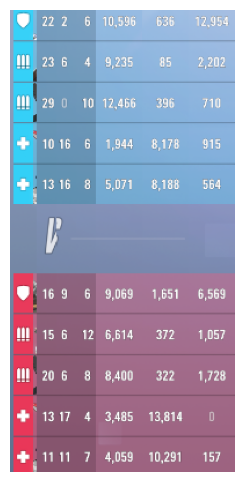

[[0 0 2 2 0 2 0 6 1 0 5 9 6 0 0 6 3 6 1 2 9 5 4]
 [0 1 2 3 0 6 0 4 0 9 2 3 5 0 0 0 8 5 0 2 2 0 2]
 [0 1 2 9 0 0 1 0 1 2 4 6 6 0 0 3 9 6 0 0 7 1 0]
 [0 2 1 0 1 6 0 6 0 1 9 4 4 0 8 1 7 8 0 0 9 1 5]
 [0 2 1 3 1 6 0 8 0 5 0 7 1 0 8 1 8 8 0 0 5 6 4]
 [1 0 1 6 0 9 0 6 0 9 0 6 9 0 1 6 5 1 0 6 5 6 9]
 [1 1 1 5 0 6 1 2 0 6 6 1 4 0 0 3 7 2 0 1 0 5 7]
 [1 1 2 0 0 6 0 8 0 8 4 0 0 0 0 3 2 2 0 1 7 2 8]
 [1 2 1 3 1 7 0 4 0 3 4 8 5 1 3 8 1 4 0 0 0 0 0]
 [1 2 1 1 1 1 0 7 0 4 0 5 9 1 0 2 9 1 0 0 1 5 7]]


2025-12-26 06:11:03.343602: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [49]:
from pathlib import Path
from tensorflow.random import shuffle
import tensorflow as tf
from tensorflow import gather
from tensorflow.data import Dataset, AUTOTUNE
from tensorflow.image import decode_png, resize
from tensorflow.io import read_file
from matplotlib.pyplot import figure, axis, imshow, show
from numpy import array

image_paths = sorted(map(str, Path().rglob("*.png")))

data_count = len(image_paths)
indices = shuffle(tf.range(data_count))
X_shuffled = gather(image_paths, indices)
y_shuffled = tuple(gather(y, indices) for y in reshaped_tuple)

train_size = int(data_count * .9)
train_X = X_shuffled[:train_size]
val_X = X_shuffled[train_size:]

train_y = tuple(y[:train_size] for y in y_shuffled)
val_y = tuple(y[train_size:] for y in y_shuffled)


def preprocess_image(path, label):
    image = decode_png(read_file(path), channels=3)[230:930, 530:1370]
    hud_parts = [
        image[:, :40], image[:, 390:420], image[:, 450:480],
        image[:, 500:530], image[:, 570:640], image[:, 670:740], image[:, 770:]
    ]
    cropped = tf.concat(hud_parts, axis=1)
    resized = resize(cropped, (400, 194)) / 255
    return resized, label


def make_dataset(X, y, shuffle=False, batch_size=32):
    ds = Dataset.from_tensor_slices((X, y))
    ds = ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds


train_ds = make_dataset(train_X, train_y, shuffle=True)
val_ds = make_dataset(val_X, val_y, shuffle=False)
for x_batch, y_batch in train_ds.take(1):
    figure(figsize=(6, 6))
    axis("off")
    imshow(x_batch[0])
    show()
    print(array(y_batch).reshape(23, -1).T.reshape(-1, 10, 23)[0])

In [50]:
from tensorflow.keras import layers, models

In [51]:
class LearnablePositionalEncoding2D(tf.keras.layers.Layer):
    def __init__(self, height, width, channels):
        super().__init__()
        self.pe = self.add_weight((1, height, width, channels), "random_normal")

    def call(self, x):
        return x + self.pe

In [52]:
def transformer_block(x, num_heads=8, key_dim=64, ff_dim=512, dropout=0.1):
    attn = layers.MultiHeadAttention(num_heads, key_dim)(x, x)
    attn = layers.Dropout(dropout)(attn)
    x = layers.LayerNormalization()(x + attn)

    ffn = layers.Dense(ff_dim, "relu")(x)
    ffn = layers.Dense(x.shape[-1])(ffn)
    ffn = layers.Dropout(dropout)(ffn)

    return layers.LayerNormalization()(x + ffn)

In [53]:
unique_counts = result.nunique().to_dict()
unique_counts

{'T': 2,
 'R': 3,
 'E1': 6,
 'E0': 10,
 'A1': 7,
 'A0': 10,
 'DE1': 3,
 'DE0': 10,
 'DA4': 3,
 'DA3': 10,
 'DA2': 10,
 'DA1': 10,
 'DA0': 10,
 'H4': 3,
 'H3': 10,
 'H2': 10,
 'H1': 10,
 'H0': 10,
 'M4': 4,
 'M3': 10,
 'M2': 10,
 'M1': 10,
 'M0': 10}

In [66]:
def build_model(image_size=x_batch.shape[1:]):  # (400, 194, 3)
    inputs = layers.Input(shape=image_size)

    # CNN Backbone (Transfer Learning)
    backbone = tf.keras.applications.ResNet50V2(False, input_tensor=inputs)

    x = backbone.output  # (H', W', C)
    x = layers.Conv2D(256, 1, activation="relu")(x)

    # Resize to grid size
    x = layers.Resizing(10, 23)(x)

    # Positional Encoding
    x = LearnablePositionalEncoding2D(10, 23, 256)(x)

    # Flatten for Transformer
    x = layers.Reshape((10 * 23, 256))(x)

    # Transformer Encoder
    for _ in range(4):
        x = transformer_block(x)

    # Restore grid
    x = layers.Reshape((10, 23, 256))(x)

    outputs = []
    for idx, key in enumerate(unique_counts):
        outputs.append(layers.Dense(unique_counts[key], name=key)(x[:, :, idx, :]))

    model = models.Model(inputs, outputs)
    return model

In [78]:
import numpy as np

weights_by_column = {}
columns = result.columns
for col_idx, values in enumerate(reshaped_tuple):
    unique_values, counts = np.unique(values, return_counts=True)
    inverse_freq = 1.0 / counts
    normalized_weights = inverse_freq / inverse_freq.sum() * len(counts)
    weights_by_column[columns[col_idx]] = dict(enumerate(normalized_weights))
weights_by_column

{'T': {0: np.float64(0.9877058177826564), 1: np.float64(1.0122941822173437)},
 'R': {0: np.float64(1.472519958976009),
  1: np.float64(0.7635288676171899),
  2: np.float64(0.763951173406801)},
 'E1': {0: np.float64(0.01998876658973024),
  1: np.float64(0.01603975285227453),
  2: np.float64(0.029089179921537076),
  3: np.float64(0.11577493608771755),
  4: np.float64(0.5566102696524882),
  5: np.float64(5.262497094896252)},
 'E0': {0: np.float64(0.855066136825795),
  1: np.float64(0.9421726663569052),
  2: np.float64(0.9745915107906911),
  3: np.float64(1.0037321207478878),
  4: np.float64(0.9788014093254243),
  5: np.float64(0.9982049614926682),
  6: np.float64(1.0104460479769708),
  7: np.float64(1.0218377734333064),
  8: np.float64(1.123135198308975),
  9: np.float64(1.092012174741377)},
 'A1': {0: np.float64(0.0005315324355577001),
  1: np.float64(0.0017671583839802632),
  2: np.float64(0.005348859525012816),
  3: np.float64(0.021599853113746025),
  4: np.float64(0.18839871882545142)

In [83]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# 세션 초기화
clear_session()

# 모델 생성
model = build_model()

# 옵티마이저, 손실함수, 메트릭 정의
optimizer = AdamW()
losses = {col: SparseCategoricalCrossentropy(from_logits=True) for col in columns}
metrics = [SparseCategoricalAccuracy() for _ in columns]

# 모델 컴파일
model.compile(optimizer=optimizer, loss=losses, metrics=metrics)

# 모델 요약 출력
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 400, 194,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 406, 200,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 200, 97,   │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 202, 99,   │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 100, 49,   │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 100, 49,   │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 100, 49,   │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 100, 49,   │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 100, 49,   │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 100, 49,   │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 102, 51,   │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 100, 49,   │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 100, 49,   │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 100, 49,   │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 100, 49,   │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 100, 49,   │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 100, 49,   │          0 │ conv2_block1_0_c

 Total params: 27,354,805 (104.35 MB)

 Trainable params: 27,309,365 (104.18 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_ds,
    epochs=256,
    callbacks=EarlyStopping(patience=16, verbose=1, restore_best_weights=True),
    validation_data=val_ds,
    class_weight=weights_by_column
)

TypeError: can only concatenate str (not "int") to str